In [1]:
import sys
sys.path.append("..")

In [ ]:
import gymnasium as gym
import numpy as np
import numpy.typing as npt

from gymnasium.envs.toy_text.frozen_lake import generate_random_map

grid_size = 6
grid_shape = (grid_size, grid_size)

env = gym.make(
    "FrozenLake-v1",
    desc=generate_random_map(size=grid_size),
    is_slippery=False,
    render_mode="rgb_array",
)

In [9]:
from mango.utils import plot_grid, plot_trajectory
from mango.concepts import GridPartitionConcept, Int2CoordConcept

base_concept = Int2CoordConcept(grid_shape)
concepts = [
    GridPartitionConcept(grid_shape, cell_shape=(2, 2)),
    GridPartitionConcept(grid_shape, cell_shape=(3, 3)),
]

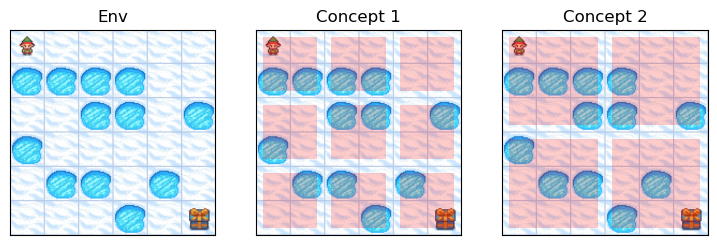

In [10]:
from matplotlib import pyplot as plt

start_state, info = env.reset()
img = env.render()

plt.figure(figsize=((1 + len(concepts)) * 3, 3))
for i, concept in enumerate([None] + concepts):
    plt.subplot(1, len(concepts) + 1, 1 + i)
    plt.title("Env" if concept is None else f"Concept {i}")
    plt.imshow(img)  # type: ignore
    if concept is not None:
        plot_grid(grid_shape, concept.cell_shape) # type: ignore
    plt.xticks([])
    plt.yticks([])
plt.show()

In [11]:
from mango.actions import FullCompatibility
from mango.mango import Mango

mango = Mango(
    environment=env,
    concepts=concepts,
    action_compatibilities=[FullCompatibility(gym.spaces.Discrete(env.action_space.n))]
    * len(concepts),
    base_concept=base_concept,
)
print(mango)

Mango(
  (0): MangoEnv(
    (concept): Int2CoordConcept(global_shape=(6, 6))
    (environment): <TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>
  )
  (1): MangoLayer(
    (concept): GridPartitionConcept(global_shape=(6, 6), cell_shape=(2, 2))
    (act_comp): FullCompatibility(action_space=Discrete(4))
    (policy): DQnetPolicyMapper(comand_space=Discrete(4), action_space=Discrete(4))
  )
  (2): MangoLayer(
    (concept): GridPartitionConcept(global_shape=(6, 6), cell_shape=(3, 3))
    (act_comp): FullCompatibility(action_space=Discrete(4))
    (policy): DQnetPolicyMapper(comand_space=Discrete(4), action_space=Discrete(4))
  )
)


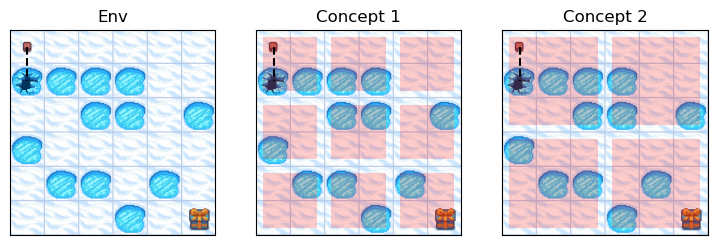

In [12]:
start_state, info = mango.reset()
img = env.render()

end_state, reward, trunc, term, info = mango.execute_option(action=1, layer=2)
img = env.render()

plt.figure(figsize=((1 + len(concepts)) * 3, 3))
for i, concept in enumerate([None] + concepts):
    plt.subplot(1, len(concepts) + 1, 1 + i)
    plt.title("Env" if concept is None else f"Concept {i}")
    plt.imshow(img)  # type: ignore
    if concept is not None:
        plot_grid(grid_shape, concept.cell_shape) # type: ignore
    plot_trajectory(start_state, info["mango:trajectory"], grid_shape)
    plt.xticks([])
    plt.yticks([])
plt.show()